In [15]:
!pip install -U keras

import tensorflow as tf
print("Tensorflow version " + tf.__version__)

import numpy as np

import matplotlib.pyplot as plt
from IPython.display import SVG

import keras
from keras.layers import Input, Convolution2D
from keras.models import Model
from keras.optimizers import Adam
from keras.utils import model_to_dot

%matplotlib inline

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)
Tensorflow version 2.2.0-rc2


[【Python】 KerasでResNet等のショートカット構造を実装する](http://ni4muraano.hatenablog.com/entry/2017/03/26/083000)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), padding="same")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), padding="same")`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(10, (3, 3), padding="same")`
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("co...)`
  app.launch_new_instance()


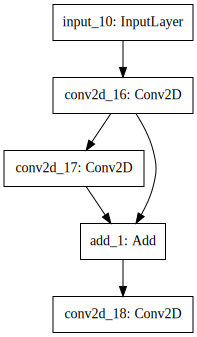

In [16]:
# 入力の形状を知らせる（ここではCIFAR-10のような32×32×3としている）
in_ = Input((32, 32, 3))

# Input⇒Convolution2D
in_conv = Convolution2D(10, 3, 3, border_mode='same')(in_)

# Input⇒Convolution2D⇒Convolution2D
in_conv_conv = Convolution2D(10, 3, 3, border_mode='same')(in_conv)

# Input⇒Convolution2DとInput⇒Convolution2D⇒Convolution2Dをマージする
merged = keras.layers.add([in_conv_conv, in_conv])

# 更にConvolution2Dを接続する
merged_conv = Convolution2D(10, 3, 3, border_mode='same')(merged)

# input, outputを指定してモデルを作成する
model = Model(input=in_, output=merged_conv)

model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

SVG(model_to_dot(model, dpi=72).create(prog='dot', format='svg'))